In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('test_df_full.csv')

In [4]:
data.head()

,paper_id,title,authors,abstract,body_text
0,0000028b5cc154f68b8a269f6578f21e31f62977,"""Multi-faceted"" COVID-19: Russian experience",NaN,NaN,['According to current live statistics at the ...
1,0001418189999fea7f7cbe3e82703d71c85a6fe5,Absence of surface expression of feline infect...,"['E Cornelissen', 'H Dewerchin', 'E Hamme', 'H...",['Feline infectious peritonitis virus (FIPV) p...,['Feline infectious peritonitis (FIP) is a fat...
2,00033d5a12240a8684cfe943954132b43434cf48,Detection of Severe Acute Respiratory Syndrome...,"['Petra Wandernoth', 'Katharina Kriegsmann', '...",['Background: Amplification of viral ribonucle...,['Severe acute respiratory syndrome coronaviru...
3,0003793cf9e709bc2b9d0c8111186f78fb73fc04,Title: Rethinking high-risk groups in COVID-19,"['Anastasia Vishnevetsky', 'Michael Levy']",NaN,"[""How do we protect our 'high-risk' patient po..."
4,000379d7a7f37a2ccb978862b9f2016bd03259ea,ScienceDirect ScienceDirect Effect of Nanomate...,"['Harish Devaraj', 'Rajiv Malhotra']",['approach. The NM shape in the conformal circ...,['Integration of functional electronic devices...


In [5]:
df = data

In [6]:
df.memory_usage(deep=True)

Index               128
paper_id       12504755
title          20445494
authors        22445875
abstract      170373182
body_text    5634921916
dtype: int64

In [7]:
df.isna().sum()

paper_id         0
title        14023
authors      12465
abstract     41063
body_text        0
dtype: int64

In [8]:
df.describe()

,paper_id,title,authors,abstract,body_text
count,128915,114892,116450,87852,128915
unique,128915,108497,109095,85410,127012
top,7dd72bed57ec7334e414d73c55e5b2d7689b912a,Journal Pre-proof,"['Xxx Xxx Xxx • Volume', 'Xxx Number']","[""Publisher's Note Springer Nature remains neu...",['The nuclear receptor heterodimers of liver X...
freq,1,303,118,98,69


preprocessing: <br>
1. making all nan values = None <br>
2. removing unwanted character from body text

In [20]:
print(type(df['body_text'][10]))
#print(df['body_text'][10])

<class 'str'>


In [22]:
print(type(df['paper_id'][10]))
print(df['paper_id'][10])

<class 'str'>
000525b51f78000644865b63d47ac27c624c5981


In [23]:
print(type(df['title'][10]))
print(df['title'][10])

<class 'str'>
Journal Pre-proof Editorial: Root causes and policy dilemmas of the COVID-19 pandemic global disaster Editorial Root causes and policy dilemmas of the COVID-19 pandemic global disaster


convert authors from string to list of strings

In [31]:
print(type(df['authors'][10]))
print(df['authors'][10][1:-1])

<class 'str'>
'Irasema Alcántara-Ayala', 'Ian Burton', 'Allan Lavell', 'Elizabeth Mansilla', 'Andrew Maskrey', 'Anthony Oliver-Smith', 'Fernando Ramírez-Gómez', 'Alcántara-Ayala ', 'I Burton', 'A Lavell', 'E Mansilla', 'A Maskrey', 'A Oliver-Smith', 'F Ramírez', 'Fernando Ramirez'


In [36]:
print(type(df['authors'][10][1:-1].split(',')))

<class 'list'>


In [78]:
#df[df['authors'].apply(lambda x: type(x)==float)]['authors'] = "None"

In [9]:
#IMPORTANT
df.loc[(df['authors'].apply(lambda x: type(x)==float)),['authors']] = 'None'
#dfmi.loc[:, ('one', 'second')] = value
# becomes
#dfmi.loc.__setitem__((slice(None), ('one', 'second')), value)

In [24]:
def change_string_to_list(x):
    y = []
    for i in x:
        if not(i == 'None'):
            i = i[1:-1].split(',')
        y.append(i)
    return y

In [25]:
TEMPORARY1 = change_string_to_list(df['authors'][:10])

In [27]:
type(TEMPORARY1[1])

list

converting all nan values in abstract to None

In [13]:
type(df['abstract'][0])

float

In [43]:
df['abstract'][0]

nan

In [14]:
df.loc[(df['abstract'].apply(lambda x: type(x)==float)),['abstract']] = 'None'

In [15]:
df[df['abstract'].apply(lambda x: type(x)==float)]

,paper_id,title,authors,abstract,body_text


making all nan in title to be None

In [16]:
df.loc[(df['title'].apply(lambda x: type(x)==float)),['title']] = 'None'

In [17]:
df[df['title'].apply(lambda x: type(x)==float)]

,paper_id,title,authors,abstract,body_text


removing unnecessary characters in our body text

In [18]:
import re

In [19]:
df[df['body_text'].apply(lambda x: type(x) != str)]
# all are of type string 

,paper_id,title,authors,abstract,body_text


In [174]:
mystring = df['body_text'][100]
#mystring

In [175]:
mystring1 = re.sub(r'[^A-Za-z]+', ' ', mystring)
#mystring1

In [176]:
mystring2 = re.sub(r"\[[^a-z]*?\]\'\"|\\|\([0-9]*\)",' ',mystring)
#mystring2

this is the function used to remove all unwanted text in the df body, like numbers, symbols, urls, etc.

In [92]:
#IMPORTANT
def substitute_body(x):
    
    regex = r'[^A-Za-z]|\n|http\S+' #everything except words [^A-Za-z]|\n|http\S+
    #regex1 = r'http\S+' #urls
    #regex2 = r'\n' #extra lines
    test_str = x
    substitute = " "
    result = re.sub(regex, substitute, test_str, 0, re.MULTILINE)
    #result = re.sub(regex1, substitute, test_str, 0, re.MULTILINE)
    #result = re.sub(regex2, substitute, test_str, 0, re.MULTILINE)
    if result:
        return (result)

In [177]:
ans = df['body_text'][125]+"http://hello.com"
#ans
#substitute_body(ans)

In [149]:
#IMPORTANT
df['body_text'] = df['body_text'].apply(lambda x: substitute_body(x))

In [178]:
#df['body_text'][125]

In [152]:
# saving updated csv
df.to_csv('clean_full.csv', index = False)

In [153]:
df_call = pd.read_csv('clean_full.csv')

In [154]:
df_call.head(10)

,paper_id,title,authors,abstract,body_text
0,0000028b5cc154f68b8a269f6578f21e31f62977,"""Multi-faceted"" COVID-19: Russian experience",None,None,According to current live statistics at the t...
1,0001418189999fea7f7cbe3e82703d71c85a6fe5,Absence of surface expression of feline infect...,"['E Cornelissen', 'H Dewerchin', 'E Hamme', 'H...",['Feline infectious peritonitis virus (FIPV) p...,Feline infectious peritonitis FIP is a fatal ...
2,00033d5a12240a8684cfe943954132b43434cf48,Detection of Severe Acute Respiratory Syndrome...,"['Petra Wandernoth', 'Katharina Kriegsmann', '...",['Background: Amplification of viral ribonucle...,Severe acute respiratory syndrome coronavirus...
3,0003793cf9e709bc2b9d0c8111186f78fb73fc04,Title: Rethinking high-risk groups in COVID-19,"['Anastasia Vishnevetsky', 'Michael Levy']",None,How do we protect our high risk patient popul...
4,000379d7a7f37a2ccb978862b9f2016bd03259ea,ScienceDirect ScienceDirect Effect of Nanomate...,"['Harish Devaraj', 'Rajiv Malhotra']",['approach. The NM shape in the conformal circ...,Integration of functional electronic devices ...
5,00039b94e6cb7609ecbddee1755314bcfeb77faa,Plasma inflammatory cytokines and chemokines i...,"['W Lam', 'C Wong', 'C Lam', 'A Wu', 'W Ip', '...",['Severe acute respiratory syndrome (SARS) is ...,Severe acute respiratory syndrome SARS is a r...
6,0003ddc51c4291d742855e9ac56076a3bea33ad7,Journal Pre-proofs The Fire This Time: The Str...,"['Olusola Ajilore', 'April Thames']",None,It is said that crisis reveals character The ...
7,0003ddfb7ce19bcb3f38907f69676163b9863535,None,"['Allan De Guzman', 'Darwin Angcahan']","[""The value of professional identity is an int...",Considered as the most important asset in the...
8,0004456994f6c1d5db7327990386d33c01cff32a,None,"['Chris Williams', 'Brunhilde Schweiger', 'Gen...",['Background: Influenza immunisation for healt...,The German standing commission for immunisati...
9,0004774b55eb0dad880aba9b572efe362660c5e0,Disaster Perceptions,None,None,So if there is no singular definition of risk...


In [156]:
substitute_body(df['title'][0])

' Multi faceted  COVID     Russian experience'

In [164]:
type(df_call['body_text'][1])

str

In [162]:
df_call['authors'][1]

"['E Cornelissen', 'H Dewerchin', 'E Hamme', 'H Nauwynck']"

testing regex strings

In [185]:
import re

regex = r"\\[^[]*?\]|\\|\([^()]*\)"

test_str = df.body_text[6]
subst = " "

# You can manually specify the number of replacements by changing the 4th argument
result = re.sub(regex, subst, test_str, 0, re.MULTILINE)

if result:
    print (result)
#\[[^a-z]*?\]|\\|\)|\(

["It is said that crisis reveals character. The COVID-19 pandemic has revealed the inequitable character of the U.S. health care system by the alarming death rates among African Americans with COVID-19. Nationwide, African Americans represent a third of hospitalized COVID-19 patients but make up only 13% of the U.S. population. In Chicago, one of the nation's hotspots, African American make up 42% of the cases and 56% of the deaths from the virus 1 There are several pathways that contribute to racial disparities in COVID-19 cases and death.", 'First, we must consider biological underpinnings that are specific to COVID-19. Angiotensin-Converting Enzyme 2   is the entry receptor utilized by COVID-19 and is thought to negatively regulate the activated renin-angiotensin system by diverting the generation of vasoconstrictor angiotensin II   towards the inactive Ang 1-9 and vasodilatatory Ang 1-7 peptides. A few studies have found racial differences in ACE2 activity, showing African American

## EDA

In [31]:
df['authors'][1]

["'E Cornelissen'", " 'H Dewerchin'", " 'E Hamme'", " 'H Nauwynck'"]

In [28]:
df['authors'] = change_string_to_list(df['authors'])

In [30]:
len(df['authors'][1])

4

In [36]:
#removing null values of authors and visualizing number of authors
authors_df = df[df['authors']!='None']

In [37]:
authors_df['author_count'] = authors_df['authors'].apply(lambda x: len(x))

<ipython-input-37-260ebbb2106a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors_df['author_count'] = authors_df['authors'].apply(lambda x: len(x))


In [45]:
authors_df['author_count'].value_counts()

3      14374
2      14275
4      13031
5      11300
1       9719
       ...  
110        1
135        1
366        1
111        1
155        1
Name: author_count, Length: 161, dtype: int64

C:\Users\chopr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='author_count'>

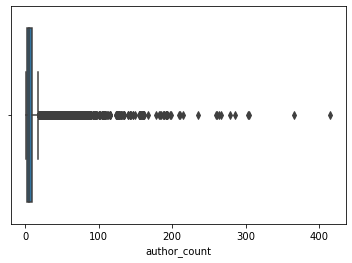

In [46]:
sns.boxplot(authors_df['author_count'])

In [49]:
authors_df.describe()

,author_count
count,116450.000000
mean,7.232684
std,8.820640
min,1.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,415.000000


In [73]:
i = authors_df[authors_df['author_count']>30].index

In [74]:
authors_df = authors_df.drop(i,axis=0)

In [84]:
authors_df['author_count'].value_counts()

3     14374
2     14275
4     13031
5     11300
1      9719
6      9514
7      7632
8      6327
9      5064
10     4291
11     3237
12     2687
13     2082
14     1769
15     1433
16     1167
17      996
18      856
19      695
20      642
21      537
23      441
22      438
24      379
25      335
26      274
27      238
28      236
29      211
30      200
Name: author_count, dtype: int64

In [83]:
authors_df[authors_df['author_count']==30]

,paper_id,title,authors,abstract,body_text,author_count
1372,02c21bef8cc81d14e19c41cf4888c48282cf2ba0,Rapid community-driven development of a SARS- ...,"['Michael Getz', 'Yafei Wang', 'Gary An', '...","['The 2019 novel coronavirus, SARS-CoV-2, is a...","[""The ongoing pandemic caused by the novel sev...",30
1910,03c90897f5a28bb42fe7344bb4477f3bd5a23336,COVID-19 and Older People in Asia: AWGS Calls ...,"['Wee-Shiong Lim', 'Chih-Kuang Liang', 'Pras...","['Japan 11 Health Promotion Administration, Mi...",['The coronavirus disease 2019 pandemic has ev...,30
2307,04908565dc76425cc6a3fabc1dff0bce3860e3c2,Drivers for emerging issues in animal and plan...,"['Jane Richardson', 'Caryl Lockhart', 'Stefa...","[""The history of agriculture includes many ani...","['An emerging risk to plant, animal and/or hum...",30
2330,049d8ffa365d675b67e91d8516944e3180bf7df9,Decreased T cell populations contribute to the...,"['Rui Liu', 'Ying Wang', 'Jie Li', 'Huan Ha...",['# These authors contributed equally to the w...,"[""The COVID-19 is highly contagious and its pa...",30
3715,075a0ff49cd29302e4d895155fe769f571b2871f,Exploring an Integrative Therapy for Treating ...,"['Jia-Bo Wang', 'Wang Zhong-Xia', 'Jing Jing...",['number of patients with a new type of pneumo...,['respiratory illnesses that can lead to acute...,30
...,...,...,...,...,...,...
125789,f9cf27a10df8349bb5787688c6c82bbc598c3bc0,No evidence of clinical efficacy of hydroxychl...,"['Matthieu Mahévas', 'Viet-Thi Tran', 'Mathi...",['Treatments are urgently needed to prevent re...,['The WHO-declared pandemic of severe acute re...,30
126696,fb8effe32fb79abcbb332960089ef6d3c5d3eead,Inter-country variability over time in the mor...,"['Oscar Peñuelas', 'Alfonso Muriel', 'Victor...",['Purpose: Variations in clinical characterist...,['The management of mechanically ventilated pa...,30
126964,fc11dc20545fe3c977474443ae533a44d851e24c,Saturday 5 April -Respiratory Nurses SIG Oral ...,"['S Mahadev', 'C Htun', 'C Salome', 'G King...",['Expiratory fl ow limitation (EFL) during tid...,['Patients with non-eosinophilic asthma (NEA) ...,30
127092,fc5150277fa072b2e602e5fdf301c4962b033936,Impaired type I interferon activity and exacer...,"['Jérôme Hadjadj', 'Nader Yatim', 'Laura Bar...","['already caused more than 100,000 deaths worl...",['Early clinical descriptions of the first SAR...,30


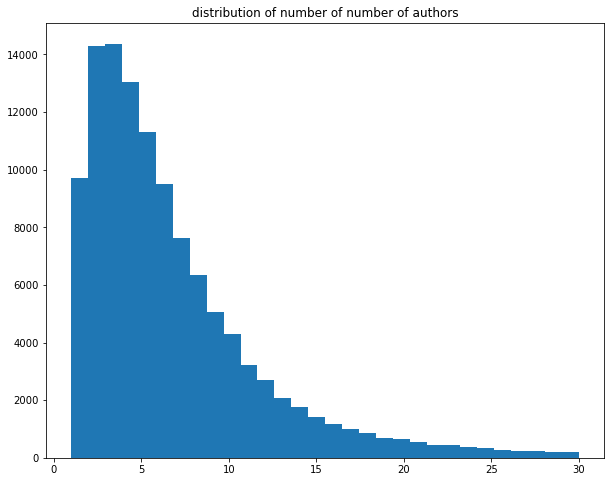

In [172]:
plt.figure(figsize = (10,8))
plt.hist(authors_df['author_count'], bins = 30)
plt.title("distribution of number of number of authors")
plt.show()

In [93]:
authors_df['body_text'] = authors_df['body_text'].apply(lambda x: substitute_body(x))

In [98]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import chart_studio.plotly as py
import plotly
import nltk
import wordcloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [99]:
plotly.offline.init_notebook_mode(connected=True)
cf.go_offline() # required to use plotly offline (no account required).

In [101]:
import langdetect
from langdetect import detect

In [111]:
[detect(authors_df["body_text"][1])]

['en']

In [117]:
from tqdm import tqdm

In [119]:
df1 = authors_df.sample(frac=0.20, random_state=1)

In [140]:
df1=df1[df1['body_text'].apply(lambda x: any(c.isalpha() for c in x)== True)]

In [143]:
lang = []
for i in tqdm(df1['body_text']):
        lang.append(detect(i))

100%|████████████████████████████████████████████████████████████████████████████| 22874/22874 [27:16<00:00, 13.98it/s]


In [163]:
l2 = pd.Series(lang).value_counts()
l3 = pd.DataFrame(l2)
l3

,0
en,22362
de,230
es,129
fr,107
nl,26
it,15
pt,2
cy,1
tl,1
sq,1


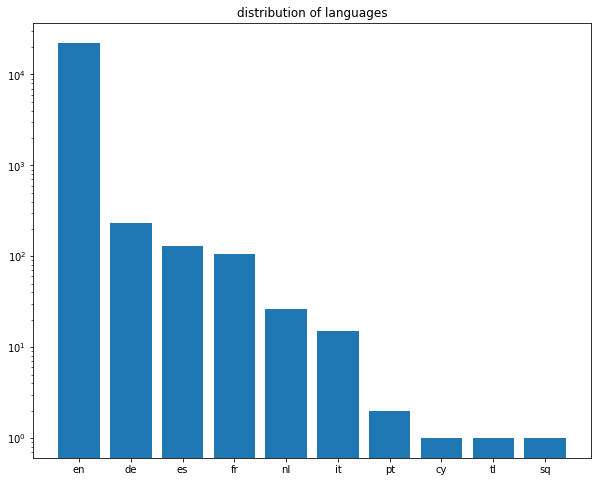

In [173]:
plt.figure(figsize = (10,8))
plt.bar(x = l3.index,height = l3[0])
plt.yscale('log')
plt.title("distribution of languages")
plt.show()

In [148]:
l1 = pd.DataFrame(lang)
l1

,0
0,en
1,en
2,en
3,en
4,en
...,...
22869,en
22870,en
22871,en
22872,en
